In [1]:
import pandas as pd
import numpy as np                # Numerical Python; Arrays ; Multi dimentional objects
import matplotlib.pyplot as plt   # creating static, animated, and interactive visualizations in Python
import datetime as dt
import seaborn as sns     # data visualization library
import re                 # Regular Expressions

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims_data = pd.read_csv("claims.csv")
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
cust_data = pd.read_csv("cust_demographics.csv")
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
data = pd.merge(left =  cust_data, right = claims_data, left_on = "CUST_ID", right_on = "customer_id", how = "inner")
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [5]:
data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [6]:
data.convert_dtypes()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4,No


In [7]:
data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
data["DateOfBirth"] = pd.to_datetime(data["DateOfBirth"]).dt.strftime('%d-%m-%Y')
data["claim_date"] = pd.to_datetime(data["claim_date"]).dt.strftime('%d-%m-%Y')

In [9]:
data.dtypes


CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [10]:
data["DateOfBirth"] = pd.to_datetime(data["DateOfBirth"])

In [11]:
data["claim_date"] = pd.to_datetime(data["claim_date"])

In [12]:
data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [13]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-12-01,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-11-03,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-11-03,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-01-05,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


In [14]:
data['claim_amount'] = data['claim_amount'].astype(str)

In [15]:
data['claim_amount'] = data['claim_amount'].str.replace('$','')

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19856/1806704005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['claim_amount'] = data['claim_amount'].str.replace('$','')


In [16]:
data['claim_amount'] = data['claim_amount'].astype(float)

In [17]:
data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [18]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-12-01,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-11-03,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-11-03,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-01-05,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [19]:
data.duplicated().sum()

0

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [20]:
def function(data):
    if data.police_report == 'No':
        return '0'
    elif data.police_report == 'Unknown':
        return '0'
    else :
        return '1'

In [21]:
data["Flag"] = data.apply(function,axis=1).astype(int)

In [22]:
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593,Female,1979-12-01,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-11-03,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-11-03,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-01-05,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-06-09,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-09-05,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-11-04,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


In [23]:
data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
Flag                            int32
dtype: object

# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [24]:

data = data.drop_duplicates(subset = 'CUST_ID',keep = 'last')

In [25]:
claim = pd.pivot_table(data=data,index="CUST_ID",values="claim_id",aggfunc="count")
claim

,claim_id
CUST_ID,
154557,1
263204,1
287476,1
441097,1
524545,1
...,...
99674324,1
99723844,1
99761663,1


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [26]:
data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Flag                    0
dtype: int64

In [27]:
data['claim_amount'] = data["claim_amount"].fillna(data["claim_amount"].mean())

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19856/2428727533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['claim_amount'] = data["claim_amount"].fillna(data["claim_amount"].mean())


In [28]:
data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
Flag                    0
dtype: int64

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18 <br>
Youth 18-30 <br>
Adult 30-60 <br>
Senior > 60

In [29]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593,Female,1979-12-01,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0
3,30308357,Female,1984-11-03,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
5,47830476,Female,1986-01-05,MA,413-187-7945,Silver,91609100,47830476,Natural causes,2017-12-04,Auto,Unknown,Material only,1440.0,1.0,No,0
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0


In [30]:
data["DateOfBirth	"] = pd.to_datetime(data['DateOfBirth'])


C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19856/775818094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["DateOfBirth	"] = pd.to_datetime(data['DateOfBirth'])


In [31]:
import datetime as dt
thisyear=pd.to_datetime('today').year
thisyear

2022

In [32]:
data["Age"] = thisyear - data["DateOfBirth"].dt.year
data

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19856/3559837753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = thisyear - data["DateOfBirth"].dt.year


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,DateOfBirth\t,Age
0,21868593,Female,1979-12-01,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,1979-12-01,43
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0,2070-01-13,-48
3,30308357,Female,1984-11-03,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,1984-11-03,38
5,47830476,Female,1986-01-05,MA,413-187-7945,Silver,91609100,47830476,Natural causes,2017-12-04,Auto,Unknown,Material only,1440.0,1.0,No,0,1986-01-05,36
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0,1977-05-13,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-06-09,Auto,Yes,Material only,1770.0,1.0,No,1,1981-03-15,41
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-09-05,Home,No,Material only,2800.0,1.0,No,0,1996-07-07,26
1082,19888166,Male,1990-11-04,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1,1990-11-04,32
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0,2064-10-22,-42


In [33]:
def agefunc(data):
    if data.Age > 60:
        return "Senior"
    elif data.Age < 18:
        return "Child"
    elif data["Age"]:
        return "Adult"
    else:
        return "Youth"

In [34]:
data['age_cat'] = np.where(data.Age < 18, "Children",np.where(data.Age < 30, "Youth",
                        np.where(data.Age < 60, "Adult",
                          np.where(data.Age < 100, "Senior", "NaN"))))
data
#data['age_cat'] = data['age_cat'].fillna(data['Age_group'].mode())

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19856/733964041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_cat'] = np.where(data.Age < 18, "Children",np.where(data.Age < 30, "Youth",


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,DateOfBirth\t,Age,age_cat
0,21868593,Female,1979-12-01,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,1979-12-01,43,Adult
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-03-10,Home,Unknown,Material only,2980.0,3.0,No,0,2070-01-13,-48,Children
3,30308357,Female,1984-11-03,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,1984-11-03,38,Adult
5,47830476,Female,1986-01-05,MA,413-187-7945,Silver,91609100,47830476,Natural causes,2017-12-04,Auto,Unknown,Material only,1440.0,1.0,No,0,1986-01-05,36,Adult
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0,1977-05-13,45,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-06-09,Auto,Yes,Material only,1770.0,1.0,No,1,1981-03-15,41,Adult
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-09-05,Home,No,Material only,2800.0,1.0,No,0,1996-07-07,26,Youth
1082,19888166,Male,1990-11-04,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1,1990-11-04,32,Adult
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0,2064-10-22,-42,Children


In [35]:
data["Age"].isna().sum()

0

In [36]:
data.loc[:,"age_cat"]

0          Adult
1       Children
3          Adult
5          Adult
7          Adult
          ...   
1080       Adult
1081       Youth
1082       Adult
1083    Children
1084       Youth
Name: age_cat, Length: 1078, dtype: object

# 8. What is the average amount claimed by the customers from various segments?

In [37]:
avg_amt_sgement = pd.pivot_table(data = data , index ="Segment",values="claim_amount",aggfunc="mean")

In [38]:
avg_amt_sgement

,claim_amount
Segment,
Gold,12846.386178
Platinum,12371.644999
Silver,12267.146560


In [39]:
data.groupby(by ="Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12846.386178
Platinum,12371.644999
Silver,12267.146560


# 9) What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [40]:
from datetime import date,timedelta ,datetime
given_date = datetime.strptime("2018-10-01", '%Y-%m-%d')
before20days = (given_date -timedelta(days=20))
total=data[data["claim_date"] < before20days]
total
total["claim_amount"].sum()

12329242.909180652

In [41]:
before20days

datetime.datetime(2018, 9, 11, 0, 0)

# 10) How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [42]:
x = data["incident_cause"].unique()
x

array(['Driver error', 'Crime', 'Natural causes', 'Other causes',
       'Other driver error'], dtype=object)

In [43]:
total = data[((data["State"]=="TX") | (data["State"]=="DE") | (data["State"]=="AK")) &
                ((data["incident_cause"]=="Driver error") | (data["incident_cause"]=="Other driver error"))]

In [44]:
total.groupby(by="State")[["State"]].count()

,State
State,
AK,10
DE,15
TX,10


In [45]:
total = data[((data.incident_cause.str.contains("driver")) | (data.incident_cause.str.contains("Driver"))) & ((data["State"] == "TX") | (data["State"] == "DE") | (data["State"] == "AK"))]
total.groupby(by="State")[["State"]].count() 

,State
State,
AK,10
DE,15
TX,10


# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


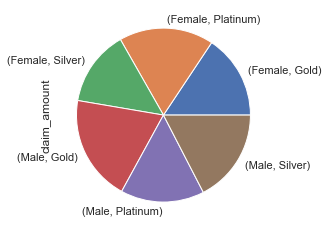

In [46]:
data.groupby(['gender','Segment'])["claim_amount"].sum().plot.pie()
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [47]:
total = data[((data.incident_cause.str.contains("driver")) | (data.incident_cause.str.contains("Driver")))]


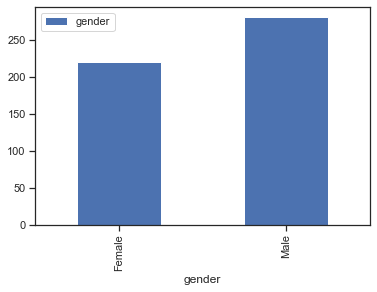

In [48]:
total.groupby(by="gender")[["gender"]].count().plot.bar()
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

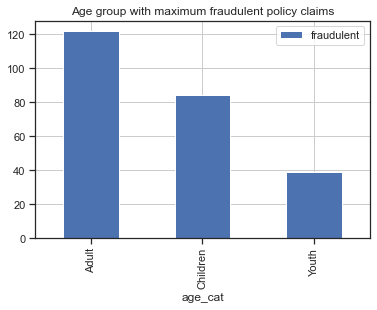

In [49]:
tot = data[data["fraudulent"] == "Yes"]
total = pd.pivot_table(data = tot , index ="age_cat",values="fraudulent",aggfunc="count")
total.plot(kind = "bar",title="Age group with maximum fraudulent policy claims")
plt.grid()
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [50]:
data["claim_date"] = pd.to_datetime(data["claim_date"])

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19856/2673876602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["claim_date"] = pd.to_datetime(data["claim_date"])


In [51]:
data["month"] = data["claim_date"].dt.month_name()

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19856/1494440157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month"] = data["claim_date"].dt.month_name()


In [52]:
final =  data.groupby(by="month")[["claim_amount"]].sum()

In [53]:
final

,claim_amount
month,
April,1.031228e+06
August,7.947155e+05
December,7.107455e+05
February,9.828440e+05
January,1.375602e+06
July,1.518227e+06
June,1.414068e+06
March,1.365293e+06
May,9.680249e+05


In [54]:
sorted_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November',
                 'December']
sorted_month = final.loc[sorted_months,:] 
print(sorted_month)

           claim_amount
month                  
January    1.375602e+06
February   9.828440e+05
March      1.365293e+06
April      1.031228e+06
May        9.680249e+05
June       1.414068e+06
July       1.518227e+06
August     7.947155e+05
September  1.099521e+06
October    1.574193e+06
November   6.421425e+05
December   7.107455e+05


# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [55]:
fraud = data[data["fraudulent"]=="Yes"]
fraud.groupby(['gender','age_cat'])[['claim_amount']].mean().reset_index()


,gender,age_cat,claim_amount
0,Female,Adult,15107.168686
1,Female,Children,6233.868554
2,Female,Youth,9220.450407
3,Male,Adult,17564.607470
4,Male,Children,14042.344991
5,Male,Youth,7799.610535


In [56]:
non_fraud = data[data["fraudulent"]=="No"]
non_fraud.groupby(['gender','age_cat'])[['claim_amount']].mean().reset_index()

,gender,age_cat,claim_amount
0,Female,Adult,12279.084371
1,Female,Children,12081.124136
2,Female,Youth,13174.536397
3,Male,Adult,12361.541573
4,Male,Children,12450.133192
5,Male,Youth,12089.533384


In [57]:
final=pd.merge(fraud,non_fraud,on=["gender","age_cat"])
final

,CUST_ID_x,gender,DateOfBirth_x,State_x,Contact_x,Segment_x,claim_id_x,customer_id_x,incident_cause_x,claim_date_x,...,claim_area_y,police_report_y,claim_type_y,claim_amount_y,total_policy_claims_y,fraudulent_y,Flag_y,DateOfBirth\t_y,Age_y,month_y
0,33507197,Female,2066-09-09,RI,165-519-4583,Gold,63246959,33507197,Crime,2017-07-22,...,Home,Unknown,Material only,2980.000000,3.0,No,0,2070-01-13,-48,March
1,33507197,Female,2066-09-09,RI,165-519-4583,Gold,63246959,33507197,Crime,2017-07-22,...,Auto,Yes,Injury only,32560.000000,1.0,No,1,2069-01-14,-47,April
2,33507197,Female,2066-09-09,RI,165-519-4583,Gold,63246959,33507197,Crime,2017-07-22,...,Auto,No,Injury only,31380.000000,1.0,No,0,2065-08-13,-43,June
3,33507197,Female,2066-09-09,RI,165-519-4583,Gold,63246959,33507197,Crime,2017-07-22,...,Auto,No,Material only,12501.489635,1.0,No,0,2067-04-22,-45,March
4,33507197,Female,2066-09-09,RI,165-519-4583,Gold,63246959,33507197,Crime,2017-07-22,...,Home,No,Material only,1210.000000,1.0,No,0,2062-07-27,-40,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39004,18369428,Male,1993-03-05,OK,256-457-9645,Gold,22576028,18369428,Other causes,2017-11-08,...,Auto,No,Material only,12501.489635,3.0,No,0,1994-07-04,28,July
39005,18369428,Male,1993-03-05,OK,256-457-9645,Gold,22576028,18369428,Other causes,2017-11-08,...,Auto,No,Material only,1690.000000,1.0,No,0,1997-05-31,25,July
39006,18369428,Male,1993-03-05,OK,256-457-9645,Gold,22576028,18369428,Other causes,2017-11-08,...,Auto,No,Material only,2630.000000,1.0,No,0,1994-12-17,28,July
39007,18369428,Male,1993-03-05,OK,256-457-9645,Gold,22576028,18369428,Other causes,2017-11-08,...,Auto,No,Material only,2320.000000,3.0,No,0,1997-10-21,25,January


In [ ]:
final.plot(kind="bar",figsize=(10,7))

Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements. 
